## Model Tuning

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
train = pd.read_csv('../datasets/train_cleaned.csv', keep_default_na=False, na_values='')
test = pd.read_csv('../datasets/test_cleaned.csv', keep_default_na=False, na_values='')

### Ridge Model

In [69]:
# https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

numeric = ['mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'garage_area']
numeric_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='mean')),
        ('ss', StandardScaler())
    ])

categorical = [
    'overall_qual', 'overall_cond', 'roof_matl', 'mas_vnr_type', 
    'foundation', 'exter_qual', 'exter_cond', 'bsmt_qual',
    'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 
    'bsmtfin_type_2', 'heating_qc', 'central_air', 'electrical',
    'bsmt_full_bath', 'full_bath', 'kitchen_qual', 'totrms_abvgrd',
    'fireplaces', 'fireplace_qu', 'garage_type', 'garage_finish', 
    'garage_cars', 'garage_qual', 'paved_drive'
]
categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, categorical)
    ], remainder='passthrough', verbose_feature_names_out=False)

ridge_pipe = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('classifier', RidgeCV())
    ])

In [70]:
X = train[['mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', 
    '1st_flr_sf', 'gr_liv_area', 'garage_area', 'overall_qual', 
    'overall_cond', 'roof_matl', 'mas_vnr_type', 'foundation', 
    'exter_qual', 'exter_cond', 'bsmt_qual','bsmt_cond', 
    'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 
    'heating_qc', 'central_air', 'electrical','bsmt_full_bath', 
    'full_bath', 'kitchen_qual', 'totrms_abvgrd', 'fireplaces', 
    'fireplace_qu', 'garage_type', 'garage_finish', 'garage_cars', 
    'garage_qual', 'paved_drive']]
y = train['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['mas_vnr_area',
                                                   'bsmtfin_sf_1',
                                                   'total_bsmt_sf',
                                                   '1st_flr_sf', 'gr_liv_area',
                                                   'garage_area']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                         

In [72]:
ridge_pipe.score(X_train, y_train), ridge_pipe.score(X_test, y_test)

C:\Users\jacki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(0.9178700362072286, 0.9004000793875788)

These r2 scores are much better than the linear regression model, and much closer together.

In [73]:
mean_squared_error(y_train, ridge_pipe.predict(X_train))**0.5

20793.622830997287

In [74]:
mean_squared_error(y_test, ridge_pipe.predict(X_test))**0.5

C:\Users\jacki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


24607.075784686036

The RMSE's here is similar to the linear regression model - it's doing much better than the baseline.

In [75]:
ridge_pipe.named_steps['preprocessor'].get_feature_names_out()

array(['mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', '1st_flr_sf',
       'gr_liv_area', 'garage_area', 'overall_qual_2', 'overall_qual_3',
       'overall_qual_4', 'overall_qual_5', 'overall_qual_6',
       'overall_qual_7', 'overall_qual_8', 'overall_qual_9',
       'overall_qual_10', 'overall_cond_2', 'overall_cond_3',
       'overall_cond_4', 'overall_cond_5', 'overall_cond_6',
       'overall_cond_7', 'overall_cond_8', 'overall_cond_9',
       'roof_matl_Membran', 'roof_matl_Tar&Grv', 'roof_matl_WdShake',
       'roof_matl_WdShngl', 'mas_vnr_type_BrkFace', 'mas_vnr_type_None',
       'mas_vnr_type_Stone', 'foundation_CBlock', 'foundation_PConc',
       'foundation_Slab', 'foundation_Stone', 'foundation_Wood',
       'exter_qual_3', 'exter_qual_4', 'exter_qual_5', 'exter_cond_2',
       'exter_cond_3', 'exter_cond_4', 'exter_cond_5', 'bsmt_qual_1.0',
       'bsmt_qual_2.0', 'bsmt_qual_3.0', 'bsmt_qual_4.0', 'bsmt_qual_5.0',
       'bsmt_cond_1.0', 'bsmt_cond_2.0', 'bsmt_cond_3.0

In [76]:
model_coefs = pd.Series(ridge_pipe.named_steps['classifier'].coef_, 
        index=ridge_pipe.named_steps['preprocessor'].get_feature_names_out())

In [79]:
model_coefs.sort_values()

roof_matl_WdShake   -15006.653597
overall_qual_4      -14763.098253
overall_qual_3      -13025.221719
overall_cond_2      -12667.290331
totrms_abvgrd_12    -12284.645018
                         ...     
exter_qual_5         26633.580037
overall_cond_8       28205.541539
overall_qual_9       45815.740605
roof_matl_WdShngl    49643.544760
overall_qual_10      72487.860762
Length: 128, dtype: float64

**This ridge model is an improvement. Since there are numerous features, I decided to do the lasso to compare.**

In [30]:
test_id = test['id']

ridge_preds = ridge_pipe.predict(test[X.columns])

ridge_preds = pd.DataFrame(ridge_preds, columns=['SalePrice'])

ridge_preds.insert(loc=0, column='Id', value=test_id)

C:\Users\jacki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [2, 3, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [31]:
ridge_preds.to_csv('../submissions/ridge.csv', index=False)

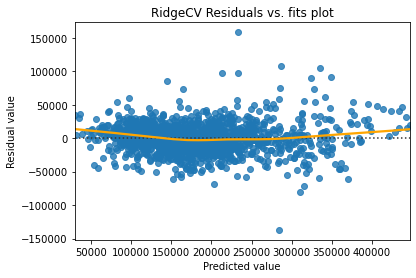

In [32]:
sns.residplot(x = ridge_pipe.predict(X_train),
              y = y_train - ridge_pipe.predict(X_train),
              lowess = True, 
              line_kws = {'color' : 'orange'})\
    .set(title = 'RidgeCV Residuals vs. fits plot',
        xlabel = 'Predicted value',
        ylabel = 'Residual value');

C:\Users\jacki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\jacki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


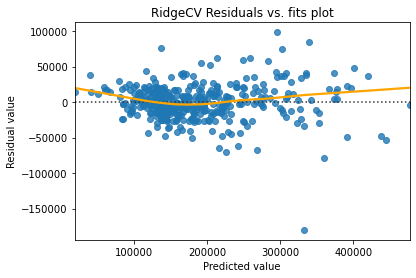

In [33]:
sns.residplot(x = ridge_pipe.predict(X_test),
              y = y_test - ridge_pipe.predict(X_test),
              lowess = True, 
              line_kws = {'color' : 'orange'})\
    .set(title = 'RidgeCV Residuals vs. fits plot',
        xlabel = 'Predicted value',
        ylabel = 'Residual value');

---

### Lasso Model

In [80]:
# https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

numeric = ['mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'garage_area']
numeric_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='mean')),
        ('ss', StandardScaler())
    ])

categorical = [
    'overall_qual', 'overall_cond', 'roof_matl', 'mas_vnr_type', 
    'foundation', 'exter_qual', 'exter_cond', 'bsmt_qual',
    'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 
    'bsmtfin_type_2', 'heating_qc', 'central_air', 'electrical',
    'bsmt_full_bath', 'full_bath', 'kitchen_qual', 'totrms_abvgrd',
    'fireplaces', 'fireplace_qu', 'garage_type', 'garage_finish', 
    'garage_cars', 'garage_qual', 'paved_drive'
]
categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, categorical)
    ], remainder='passthrough', verbose_feature_names_out=False)

lasso_pipe = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('classifier', LassoCV())
    ])

In [81]:
X = train[['mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', 
    '1st_flr_sf', 'gr_liv_area', 'garage_area', 'overall_qual', 
    'overall_cond', 'roof_matl', 'mas_vnr_type', 'foundation', 
    'exter_qual', 'exter_cond', 'bsmt_qual','bsmt_cond', 
    'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 
    'heating_qc', 'central_air', 'electrical','bsmt_full_bath', 
    'full_bath', 'kitchen_qual', 'totrms_abvgrd', 'fireplaces', 
    'fireplace_qu', 'garage_type', 'garage_finish', 'garage_cars', 
    'garage_qual', 'paved_drive']]
y = train['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['mas_vnr_area',
                                                   'bsmtfin_sf_1',
                                                   'total_bsmt_sf',
                                                   '1st_flr_sf', 'gr_liv_area',
                                                   'garage_area']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                         

In [83]:
lasso_pipe.score(X_train, y_train), lasso_pipe.score(X_test, y_test)

C:\Users\jacki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(0.9150387095355722, 0.902490526449802)

The r2 values here are similar to the ridge model. They are both close together, and above 0.9 so they are doing well.

In [84]:
mean_squared_error(y_train, lasso_pipe.predict(X_train))**0.5

21149.00289241998

In [85]:
mean_squared_error(y_test, lasso_pipe.predict(X_test))**0.5

C:\Users\jacki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


24347.4743240593

These RMSE scores are also very similar to the ridge model.

In [86]:
model_coefs = pd.Series(lasso_pipe.named_steps['classifier'].coef_, 
        index=lasso_pipe.named_steps['preprocessor'].get_feature_names_out())

In [ ]:
with pd.option_context('display.max_rows', None):
    display(pd.DataFrame(model_coefs[model_coefs != 0].sort_values(ascending=False)))

In [98]:
low_val = pd.DataFrame(model_coefs[model_coefs != 0].sort_values().head(10))
low_val

,0
overall_cond_2,-12929.894114
overall_cond_3,-11993.864034
bsmt_cond_2.0,-8516.231447
overall_qual_4,-7639.261346
overall_cond_4,-6127.787860
bsmt_qual_2.0,-5754.134496
bsmt_qual_3.0,-5520.722829
bsmt_exposure_2.0,-4961.076272
overall_qual_5,-4486.678024
overall_qual_3,-3852.463583


The above are the top features that detract value from the house.

In [101]:
big_val = pd.DataFrame(model_coefs[model_coefs != 0].sort_values(ascending=False)).head(40)
big_val

,0
overall_qual_10,84908.616006
overall_qual_9,53680.716768
roof_matl_WdShngl,35417.521047
overall_qual_8,24705.529883
gr_liv_area,22120.671408
kitchen_qual_5,21991.721926
exter_qual_5,17903.809487
overall_cond_8,14618.540229
full_bath_3,13731.160850
garage_cars_3.0,12968.797121


The above are the top features that add value to the home. I have expanded it to a fairly large list in order to pin point the features that can be rennovated, other than just the overall quality and condition of the house.

In [46]:
lasso_pipe.named_steps['classifier'].alpha_

51.592867289434295

The above is the alpha that the LassoCV chose to be the best parameter for the model.

In [47]:
test_id = test['id']

lasso_preds = lasso_pipe.predict(test[X.columns])

lasso_preds = pd.DataFrame(lasso_preds, columns=['SalePrice'])

lasso_preds.insert(loc=0, column='Id', value=test_id)

C:\Users\jacki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [2, 3, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [48]:
lasso_preds.to_csv('../submissions/lasso_2.csv', index=False)

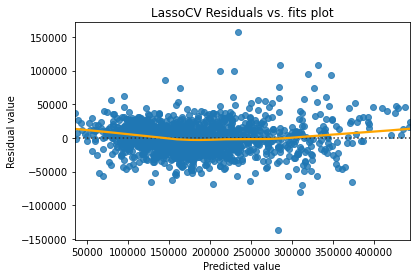

In [49]:
sns.residplot(x = lasso_pipe.predict(X_train),
              y = y_train - lasso_pipe.predict(X_train),
              lowess = True, 
              line_kws = {'color' : 'orange'})\
    .set(title = 'LassoCV Residuals vs. fits plot',
        xlabel = 'Predicted value',
        ylabel = 'Residual value');

C:\Users\jacki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\jacki\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


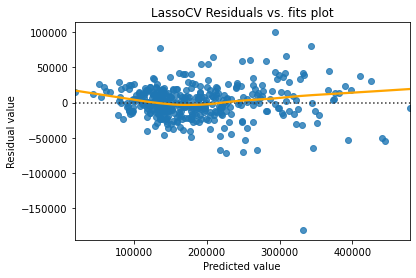

In [50]:
sns.residplot(x = lasso_pipe.predict(X_test),
              y = y_test - lasso_pipe.predict(X_test),
              lowess = True, 
              line_kws = {'color' : 'orange'})\
    .set(title = 'LassoCV Residuals vs. fits plot',
        xlabel = 'Predicted value',
        ylabel = 'Residual value');

#### I think this Lasso model is the best for the problem statement at hand. Since we are looking at several different features that could pertain to home renovations, lasso is the better model since it reduces the features that don't have a big impact on the model to zero. This makes it easier for interpretation. The one caveat is that it could reduce some features that do have an impact, but just happen to interact with another feature. To test this, the model would have to be tuned more so with each of the features.

#### This model is all about being used for inference. It is focusing on the features specifically in regards to housing price and how they might impact that. I believe it will generalize to new data well because the features that stand out and pretty common across the board with homes.

---

### Conclusion